# K-Nearest Neighbors in Scikit-Learn

To fit a $k$-nearest neighbors model in scikit-learn, we follow the same general scikit-learn API:

1. Specify the model. (For $k$-nearest neighbors, we use the `KNeighborsRegressor` model.)
2. Fit the model with `model.fit(X, y)`.
3. Predict the y-values for a new set of x-values with `model.predict(X_new)`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv("/data/harris.csv")

**Exercise 1.** Fit a 4-nearest neighbors model to the Harris Bank data set. Then, use your model to predict the starting salary of an employee with 8 years (96 months) of experience and 15 years of education.

In [2]:
from sklearn.neighbors import KNeighborsRegressor

# YOUR CODE HERE
model = KNeighborsRegressor(n_neighbors=4)
model.fit(data[['Exper', 'Educ']], data['Bsal'])
model.predict([[96, 15]])

array([ 5400.])

**Exercise 2.** Repeat Exercise 1, but first standardize the input variables (`Exper` and `Educ`) to have mean 0 and standard deviation 1. 

_Hint:_ It's not hard to standardize manually -- just calculate the means and SDs of all of your variables, subtract the means from the data frame, and divide by the SDs. Just remember to store the mean and SDs for later, since you'll also have to standardize test inputs in exactly the same way.

In [3]:
# YOUR CODE HERE
X = data[['Exper', 'Educ']]
X_mean = X.mean()
X_std = X.std()
X_standardized = (X - X_mean)/X_std

model2 = KNeighborsRegressor(n_neighbors=4)
model2.fit(X_standardized, data['Bsal'])

x_test = pd.Series({
        'Exper':96,
        'Educ':15
    })

model2.predict([(x_test - X_mean)/ X_std])

array([ 5910.])

**Exercise 3.** Use cross-validation to determine whether or not standardizing the input variables improves the predictive performance of your model.

In [4]:
from sklearn.model_selection import cross_val_score

# YOUR CODE HERE
print(-cross_val_score(model, data[['Exper', 'Educ']], data['Bsal'], cv=10, 
               scoring="neg_mean_squared_error").mean())

print(-cross_val_score(model2, X_standardized, data['Bsal'], cv=10, 
               scoring="neg_mean_squared_error").mean())

452901.1875
431459.125


**Exercise 4.** Use cross-validation to determine the optimal value of $k$. Plot both the training and test error curves as a function of $k$.

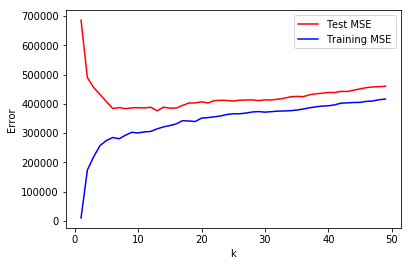

In [10]:
# YOUR CODE HERE
test = []
train = []
for n in range(1,50):
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_standardized, data['Bsal'])
    test.append(-cross_val_score(model, X_standardized, data['Bsal'], cv=10, 
               scoring="neg_mean_squared_error").mean())
    train.append(((data['Bsal'] - model.predict(X_standardized))**2).mean())
plt.plot(range(1,50), test, 'r-')
plt.plot(range(1,50), train, 'b-')

plt.ylabel('Error')
plt.xlabel('k')
plt.legend(['Test MSE', 'Training MSE'])